# Tophat advection

## Lax-Friedrichs

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#define the speed a
a=1.0

# Define the domain
L = 10.0     # Domain length
nx = 101    # Number of grid points
dx = L/(nx-1)   # Grid spacing
x = np.linspace(0, L, nx)

##print(x,'\n',dx) #just a check

# Define the time step and the final time
cf = 0.5
dt = cf*dx/a   # Time step
t_final = 20.0

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=',t_final/dt)


# Define the initial condition
u_initial = np.zeros_like(x)
u_initial[(x >= 4) & (x <= 6)] = 1

# Initialize the solution array
u_current = u_initial.copy()

#we create arrays where we will store the time and the l2norm
l2norm=[]
l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

time=[]
time.append(0.0)

nx= 101
dx= 0.1
dt= 0.05
Number of iterations= 400.0


In [2]:
# Initilize time and iteration counter
t = 0.0
i = 0

#solve the advection equation
while t < t_final:
    # Compute the new solution using the Lax-Friedrichs method
    # Note: np.roll(u_current, -1) is equivalent to u(j+1) and
    #       np.roll(u_current,  1) is equivalent to u(j-1)
    # using np.roll is equivalent to use periodic boundary conditions
    u_next = 0.5*(np.roll(u_current, -1) + np.roll(u_current, 1)) - a*dt/(2*dx)*(np.roll(u_current, -1) - np.roll(u_current, 1)) 
    
    # Update the solution
    u_current = u_next.copy()
    
    
    #advance the time 
    t += dt
    i += 1
    
    #compute the l2 norm and add the time to the time vector
    l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)

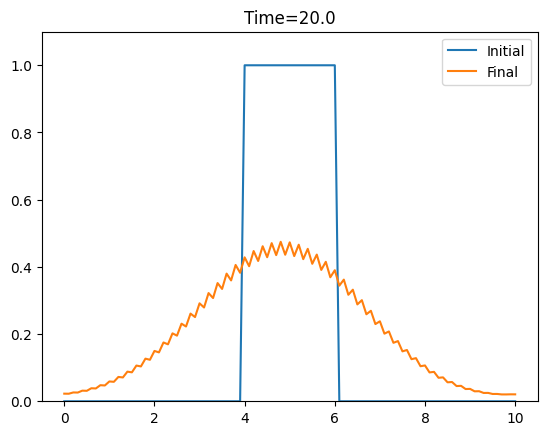

In [3]:
# Plot the final solution
plt.plot(x, u_initial, label='Initial')
plt.plot(x, u_current, label='Final')
plt.title('Time='+str(round(t,2)))
plt.ylim(0,1.1)
plt.legend()
plt.show()

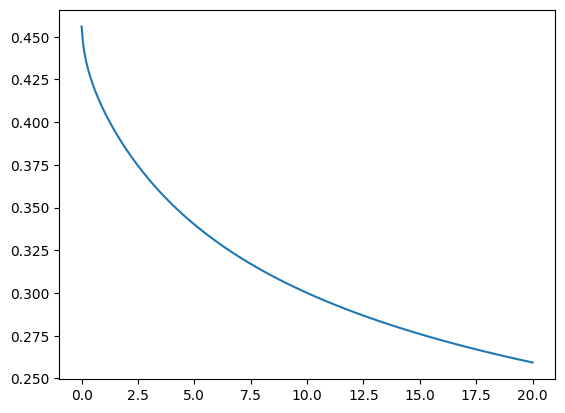

In [4]:
plt.plot(time,l2norm)
plt.show()

## Lax-Wendroff

In [5]:
#define the speed a
a=1.0

# Define the domain
L = 10.0     # Domain length
nx = 101    # Number of grid points
dx = L/(nx-1)   # Grid spacing
x = np.linspace(0, L, nx)

##print(x,'\n',dx) #just a check

# Define the time step and the final time
cf = 0.5
dt = cf*dx/a   # Time step
t_final = 20.0

# Define the initial condition
u_initial = np.zeros_like(x)
u_initial[(x >= 4) & (x <= 6)] = 1

# Initialize the solution array
u_current = u_initial.copy()

#we create arrays where we will store the time and the l2norm
l2norm=[]
l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

time=[]
time.append(0.0)

In [6]:
# Initilize time and iteration counter
t = 0.0
i = 0

#solve the advection equation
while t < t_final:
    # Compute the new solution using the Lax-Wendroff method
    # Note: np.roll(u_current, -1) is equivalent to u(j+1) and
    #       np.roll(u_current,  1) is equivalent to u(j-1)
    # using np.roll is equivalent to use periodic boundary conditions
    u_next = u_current - a*dt/(2*dx)*(np.roll(u_current, -1) - np.roll(u_current, 1)) + ((a*dt/dx)**2/2)*(np.roll(u_current, -1) - 2*u_current + np.roll(u_current, 1))   
    
    # Update the solution
    u_current = u_next.copy()
    
    
    #advance the time 
    t += dt
    i += 1
    
    #compute the l2 norm and add the time to the time vector
    l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)

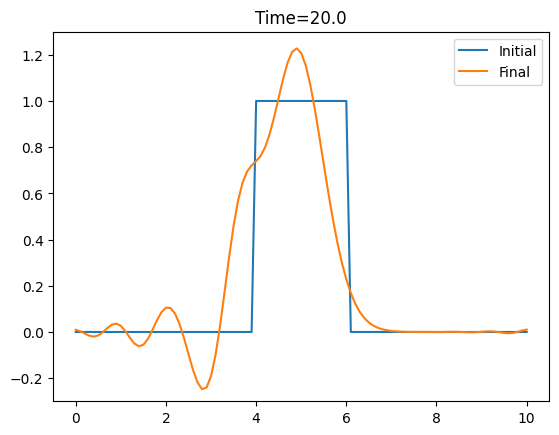

In [7]:
# Plot the final solution
plt.plot(x, u_initial, label='Initial')
plt.plot(x, u_current, label='Final')
plt.title('Time='+str(round(t,2)))
plt.ylim(-0.3,1.3)
plt.legend()
plt.show()

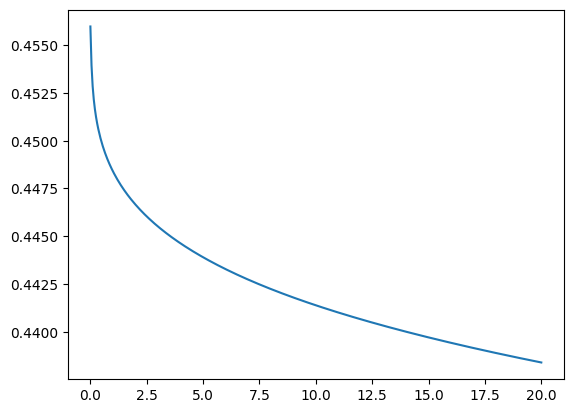

In [8]:
plt.plot(time,l2norm)
plt.show()